# MILESTONE 1

<h1>Muhamad Natual Hisak</h1>

Link Dashboard : 'https://datastudio.google.com/reporting/9d4e7992-23fd-4483-9666-0fcab4b83d9d'

<h2>General Instructions</h2>

```
1. Pilihlah satu topik bebas dan buat problem statement terlebih dahulu menggunakan metode SMART.

2. Dataset dibebaskan dari sumber manapun (BigQuery, Kaggle, BPS, dll.) dan berformat apapun (csv, excel, json, sql query, dll.) NOTE: Wajib mencantumkan sumber referensi data pada bagian Data Loading.

3. Sebelum menentukan tabel, kolom, atau hal lain dalam dataset mana yang akan dijadikan analisis dan visualisasi data, lakukan identifikasi dan penjabaran masalah supaya dapat memudahkan kamu dalam melakukan analisis. Kamu bisa menggunakan metode apapun seperti analisis SWOT, Fish bone diagram, 5W+1H, dsb.

4. Setelah melakukan identifikasi dan penjabaran masalah, tentukan metrik/data apa saja yang diperlukan lalu tarik data yang diperlukan dari dataset yang sudah ditentukan menggunakan SQL. Cantumkan semua query yang dibuat untuk menarik semua data yang diperlukan dalam milestone ini.

5. Perlu diperhatikan bahwa penjabaran masalah untuk dijawab menggunakan data visualisasi dan analisis statistik HARUS mengikuti kriteria berikut: 

- Minimal terdapat 6 penjabaran masalah dimana 4 penjabaran untuk visualisasi data, 1 penjabaran untuk statistik deskriptif, dan 1 penjabaran untuk statistik inferensial.

6. Untuk Data Visualisasi dibebaskan menggunakan tipe visualisasi (batang, garis, dsb) dan library (matplotlib, pyplot, seaborn, dsb) apapun, disesuaikan dengan penjabaran masalahnya. Minimal 4 visualisasi sesuai dengan jumlah minimum penjabaran untuk bagian visualisasi data. WAJIB memberikan insight di tiap visualisasi data.

7. Untuk Statistik Deskriptif, pilih minimal salah satu perhitungan/analisis statistik deskriptif seperti central tendency, measure of variance, outlier analysis, distribution, dsb. Sesuaikan dengan penjabaran masalah yang ditentukan.

8. Untuk Statistik Inferensial, pilih minimal salah satu perhitungan/analisis statistik inferensial seperti confidence interval, statistical significance, statistical testing, hypothesis testing: one sample, two sample independent, paired test, ANOVA, chi-square, dsb. Sesuaikan dengan penjabaran masalah yang ditentukan.

9. Output dari milestone ini adalah dashboard data visualisasi menggunakan Tableau Public atau Google Data Studio dan analisis serta pengolahan data di jupyter notebook.

```

<h2>Dashboard Instructions</h2>

```
1. Dashboard dibuat menggunakan Tableau atau Google Data Studio (Pilih salah satu).

2. Dashboard yang dibuat terdiri dari 2 bagian : Visualisasi dan Statistical Analysis yang dapat dibuat dalam 1 halaman atau multi halaman.

3. Untuk bagian Visualisasi :
    - Minimal ada 4 figure/visualisasi data yang ditampilkan dalam halaman Visualisasi yang sesuai dengan yang dibuat pada Notebook.
    - Minimal ada 1 interactivity pada dashboard
    - Tidak perlu menulis insightnya, dashboard visualisasi sejatinya hanya kumpulan visualisasi data
    - Apabila jenis plot pada dashboard dengan di Python berbeda, dari segi jenis dan hasil, tidak masalah jika lampirkan plot dari   dashboard ke notebook dan tetap tampilkan data yang sudah dipreprocess pada notebook.

4. Untuk bagian Statistical Analysis:
    - Tulis proses analisis statistik deskriptif dan inferential yang dilakukan di notebook dari masalah yang diangkat hingga    kesimpulan dari hasil analisis statistik.
    - Presentasikan dashboard yang telah dibuat pada P1W1D4PM.

```

# Working Area

Sumber dataset: https://www.kaggle.com/datasets/gregorut/videogamesales

<h2>Penjelasan isi tiap kolom</h2>

```
Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.
```

Problem Statement : 
```
Mengetahui genre game dengan jumlah penjualan terbanyak di region NA, EU, dan JP
```

Penjabaran Masalah :
```
1. Judul game apa yang paling banyak terjual ?
2. Game pada platform mana yang memiliki rata-rata penjualan terbesar?
3. Game keluaran tahun berapa yang memiliki penjualan terbesar?
4. Publisher apa yang memiliki penjualan terbesar?
5. Genre apa yang memiliki penjualan terbesar?
6. Bagaimana perbandingan penjualan game dengan genre Action pada region EU JP dan NA?
7. Apakah penjualan game pada region NA sama dengan region EU?
```

Import library yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Load dataset yang sudah di download lalu cek missing value

In [2]:
df = pd.read_csv(r'C:\Users\Omen\Desktop\Hacktiv8\Milestone 1\vgsales.csv')
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


C:\Users\Omen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


Terdapat missing value di kolom Year dan Publisher

# Data Cleaning

Copy tabel ke variabel baru agar tabel asli tidak ter overwrite saat melakukan proses Data Cleaning

In [3]:
df1 = df.copy()
df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Masukkan data "Unknown" ke dalam missing value di kolom Publisher dan angka 0 ke missing value kolom Year

In [4]:
values = {"Year":0, "Publisher":"Unknown"}
df1 = df1.fillna(value=values)
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Cek missing value lagi

In [5]:
df1.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


C:\Users\Omen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


Cek data anomali ( Game yang tidak terjual sama sekali di semua region )

In [6]:
df1.loc[(df1.NA_Sales == 0)&(df.EU_Sales == 0)&(df.JP_Sales == 0)&(df.Other_Sales == 0)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.0,0.0,0.0,0.0,0.01


Ada 1 game yang tidak terjual sama sekali, data game ini bisa di hapus

In [7]:
df1 = df1.drop([16595])

Cek apakah data sudah terhapus

In [8]:
df1.loc[(df1.NA_Sales == 0)&(df.EU_Sales == 0)&(df.JP_Sales == 0)&(df.Other_Sales == 0)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


Cek skew

In [9]:
df1.skew()

C:\Users\Omen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Rank             0.000067
Year            -7.627420
NA_Sales        18.799183
EU_Sales        18.875059
JP_Sales        11.206140
Other_Sales     24.233290
Global_Sales    17.400243
dtype: float64

Cek Q1

In [10]:
df1.quantile(.25)

Rank            4151.00
Year            2003.00
NA_Sales           0.00
EU_Sales           0.00
JP_Sales           0.00
Other_Sales        0.00
Global_Sales       0.06
Name: 0.25, dtype: float64

Cek Q3

In [11]:
df1.quantile(.75)

Rank            12449.00
Year             2010.00
NA_Sales            0.24
EU_Sales            0.11
JP_Sales            0.04
Other_Sales         0.04
Global_Sales        0.47
Name: 0.75, dtype: float64

Data ini tidak akan dilakukan outlier checking karena beberapa faktor yaitu :
1. Ada beberapa judul video game yang hanya rilis di beberapa region jadi jika ada data yang dihilangkan akan mempengaruhi akurasi.

2. Penyebaran angka penjualan tiap judul video game tidak merata karena faktor publisher yang merilis video game baru, platform, dan perkembangan industri game dunia yang selalu berkembang tiap tahunnya membuat angka penjualan akan selalu bertambah, sehingga angka penjualan yang rendah juga harus tetap dimasukkan kedalam data.

Export tabel yang sudah bersih ke local

In [12]:
df1.to_csv(r'C:\Users\Omen\Desktop\Hacktiv8\Milestone 1\vgsales_clean.csv', index = False)

# Penjabaran Masalah

1. Judul game apa yang paling banyak terjual ?

In [13]:
df1.sort_values('Global_Sales', ascending= False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Game yang paling banyak terjual adalah Wii Sports dengan global sales mencapai 82.74 Juta copy

2. Game pada platform mana yang memiliki total penjualan terbesar?

In [14]:
df2 = df1.groupby('Platform').sum()
df2.sort_values("Global_Sales", ascending=False).head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,
PS2,16142569,4261742.0,583.84,339.29,139.20,193.44,1255.63
X360,8466048,2482205.0,601.05,280.58,12.43,85.54,979.96
PS3,9027970,2622109.0,392.26,343.71,79.99,141.93,957.84
Wii,10243276,2591562.0,507.71,268.38,69.35,80.61,926.71
DS,20845831,4283493.0,390.71,194.65,175.57,60.53,822.49


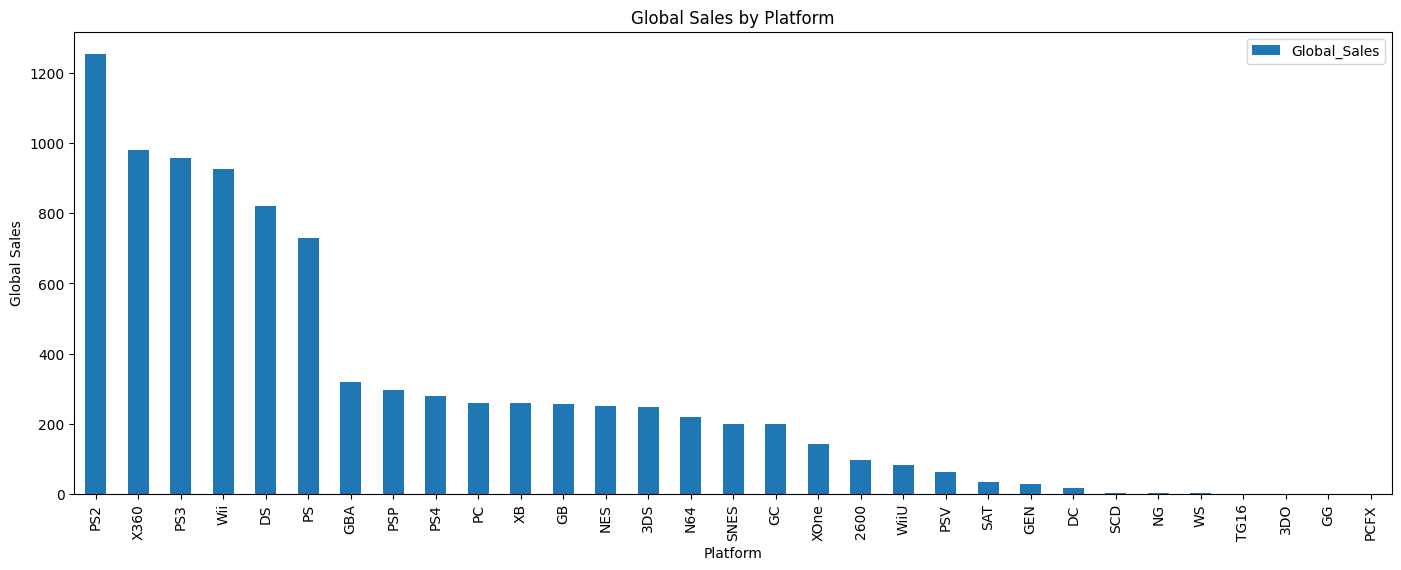

In [15]:
df02 = df2.drop(['Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year'], axis=1).sort_values("Global_Sales", ascending=False)
df02.plot(kind='bar', figsize=(17, 6))

plt.xlabel('Platform') # add to x-label to the plot
plt.ylabel('Global Sales') # add y-label to the plot
plt.title('Global Sales by Platform') # add title to the plot

plt.show()

Penjualan game tertinggi berdasarkan platform ada pada platform PS2 dengan global sales mencapai 1255.63 juta copy

3. Game keluaran tahun berapa yang memiliki penjualan terbesar?

In [16]:
df3 = df1.groupby('Year').sum()
df3.sort_values("Global_Sales", ascending=False).head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
2008.0,12071409,351.44,184.40,60.26,82.39,678.89
2009.0,12420219,338.85,191.59,61.89,74.77,667.30
2007.0,10344609,312.05,160.50,60.29,77.60,611.13
2010.0,11059005,304.24,176.73,59.49,59.90,600.45
2006.0,9563593,263.12,129.24,73.73,54.43,521.04


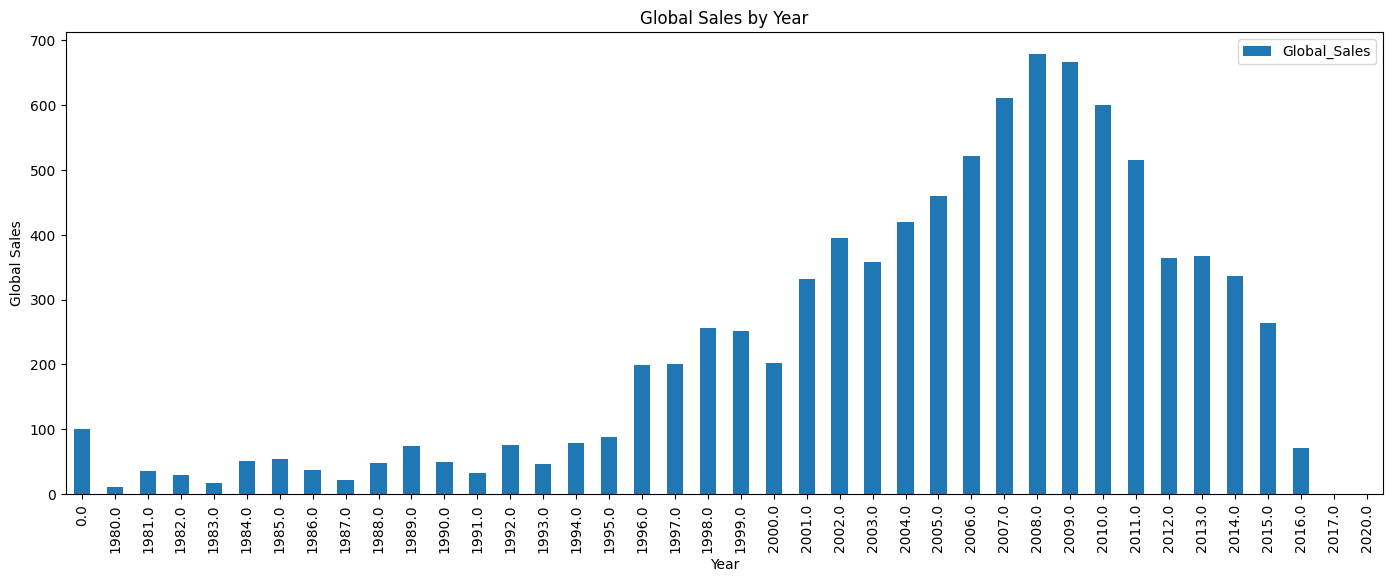

In [17]:
df03 = df3.drop(['Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
df03.plot(kind='bar', figsize=(17, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Global Sales') # add y-label to the plot
plt.title('Global Sales by Year') # add title to the plot

plt.show()

Game keluaran tahun 2008 menjadi game yang paling banyak terjual secara global sebanyak 678.89 juta copy

4. Publisher apa yang memiliki penjualan terbesar?

In [18]:
df4 = df1.groupby('Publisher').sum()
df4.sort_values("Global_Sales", ascending=False).head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
Nintendo,2714164,1394666.0,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,7140412,2686562.0,595.07,371.27,14.04,129.77,1110.32
Activision,6351727,1936971.0,429.70,215.53,6.54,75.34,727.45
Sony Computer Entertainment,4105604,1367034.0,265.22,187.72,74.10,80.45,607.50
Ubisoft,6964728,1843194.0,253.43,163.32,7.50,50.26,474.72


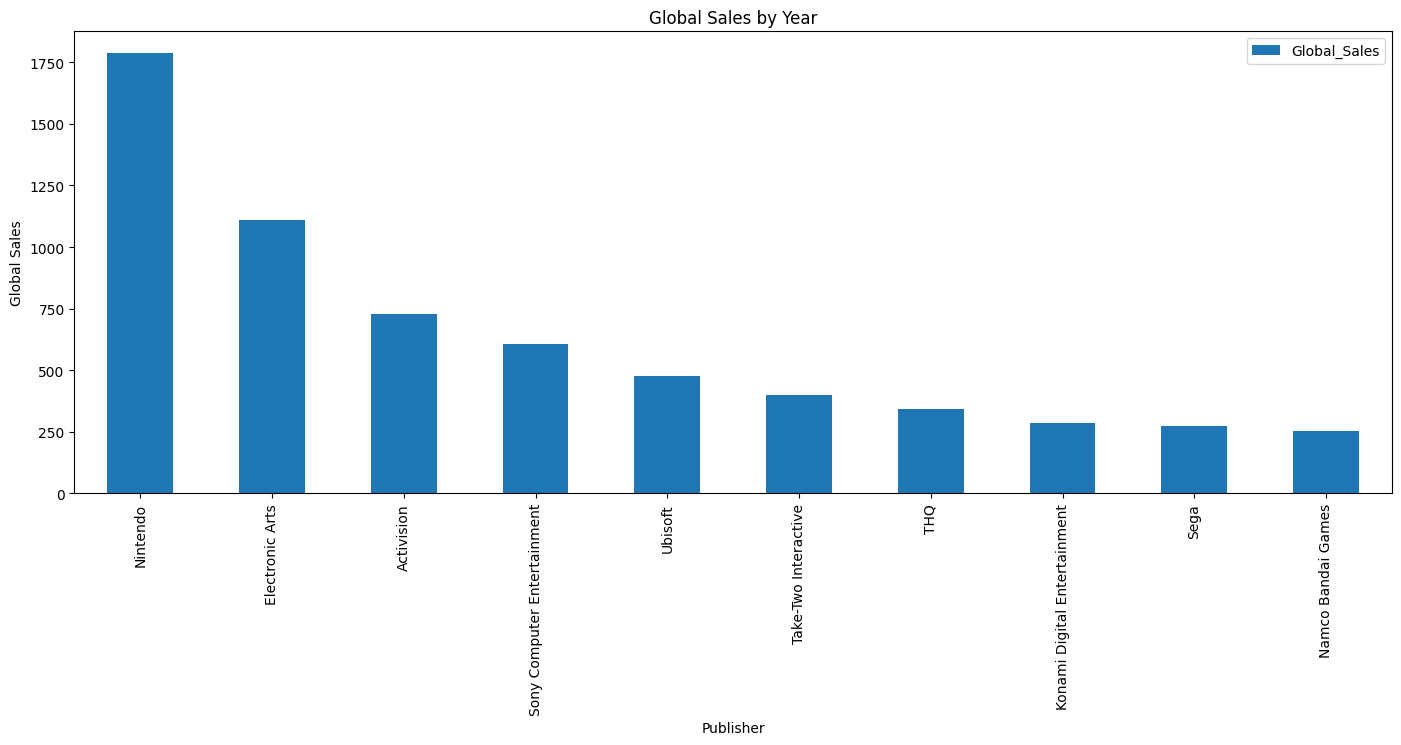

In [19]:
df04 = df4.drop(['Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year'], axis=1).sort_values("Global_Sales", ascending=False).head(10)
df04.plot(kind='bar', figsize=(17, 6))

plt.xlabel('Publisher') # add to x-label to the plot
plt.ylabel('Global Sales') # add y-label to the plot
plt.title('Global Sales by Year') # add title to the plot

plt.show()

Publisher dengan penjualan game terbanyak jatuh kepada Nintendo dengan penjualan global sebanyak 1786.56 Juta copy

5. Genre apa yang memiliki penjualan terbesar?

In [20]:
df5 = df1.groupby('Genre').sum()
df5.sort_values("Global_Sales", ascending=False).head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,26441383,6531731.0,877.83,525.00,159.95,187.38,1751.18
Sports,17419112,4620621.0,683.35,376.85,135.37,134.97,1330.93
Shooter,9653872,2571588.0,582.60,313.27,38.28,102.69,1037.37
Role-Playing,12032228,2952379.0,327.28,188.06,352.31,59.61,927.37
Platform,6137545,1755347.0,447.05,201.63,130.77,51.59,831.37


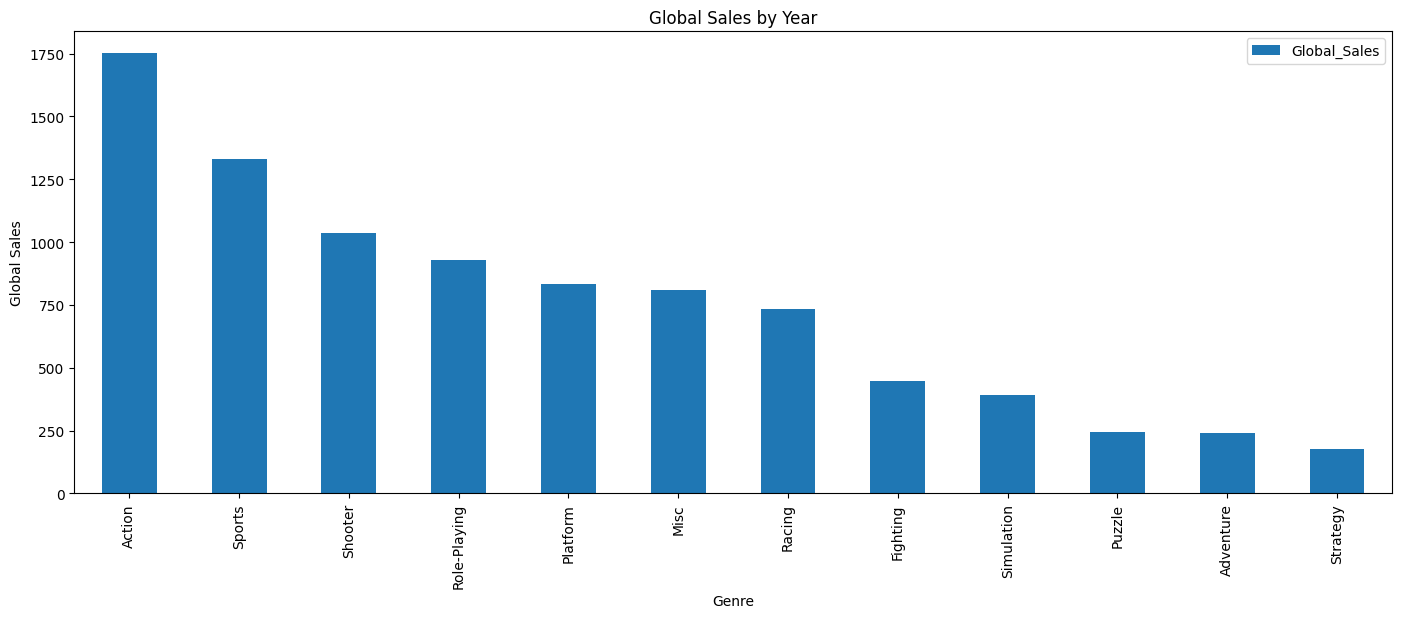

In [21]:
df05 = df5.drop(['Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year'], axis=1).sort_values("Global_Sales", ascending=False)
df05.plot(kind='bar', figsize=(17, 6))

plt.xlabel('Genre') # add to x-label to the plot
plt.ylabel('Global Sales') # add y-label to the plot
plt.title('Global Sales by Year') # add title to the plot

plt.show()

Genre game dengan penjualan terbanyak ada pada genre action dengan penjualan global sebanyak 1751.18 Juta copy

6. Bagaimana perbandingan penjualan game ber-genre action pada region EU JP dan NA?

Query : 

```
SELECT Genre,
       sum(EU_Sales) as EU_Sales,
       sum(JP_Sales) as JP_Sales,
       sum(NA_Sales) as NA_Sales,
FROM `natual-try.M1.M1_Clean` 
where Genre = "Action"
GROUP BY Genre
```

In [22]:
df6 = pd.read_csv(r'C:\Users\Omen\Desktop\Hacktiv8\Milestone 1\df6.csv')
df6

,Genre,EU_Sales,JP_Sales,NA_Sales
0,Action,525.0,159.95,877.83


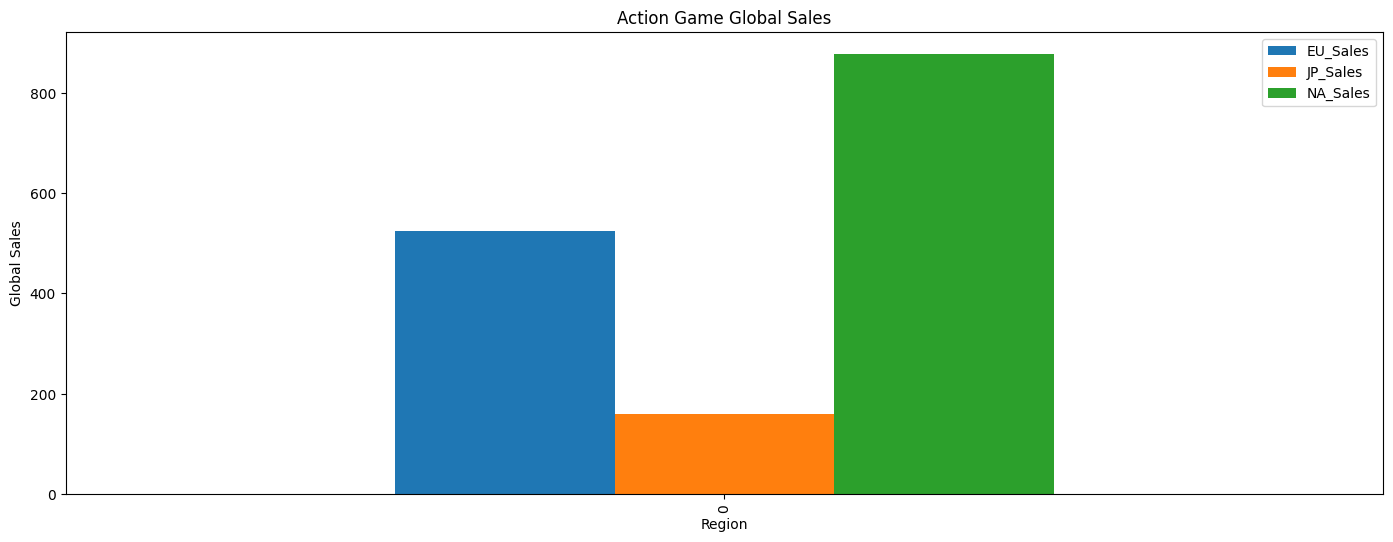

In [23]:
df6.plot(kind='bar', figsize=(17, 6))

plt.xlabel('Region') # add to x-label to the plot
plt.ylabel('Global Sales') # add y-label to the plot
plt.title('Action Game Global Sales') # add title to the plot

plt.show()

Perbandingan penjualan game ber genre action di region EU, JP, dan NA adalah 525 : 159 : 877

7. Apakah penjualan game pada region NA berbeda dari region EU?

In [24]:
df7 = df1[['Genre','EU_Sales','NA_Sales']].groupby('Genre').sum()
df7

,EU_Sales,NA_Sales
Genre,,
Action,525.00,877.83
Adventure,64.13,105.80
Fighting,101.32,223.59
Misc,215.98,410.24
Platform,201.63,447.05
Puzzle,50.78,123.78
Racing,238.39,359.42
Role-Playing,188.06,327.28
Shooter,313.27,582.60


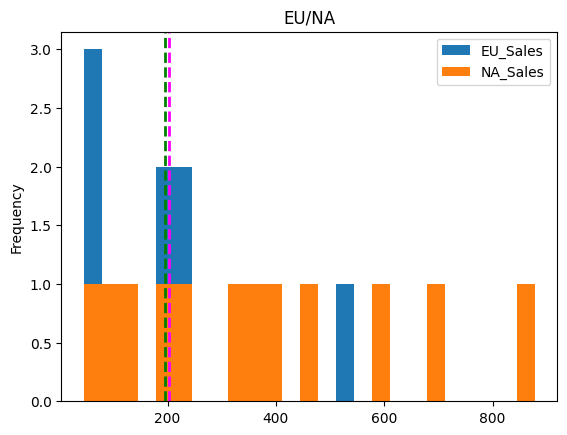

In [25]:
df7.plot.hist(title='EU/NA', bins=25)  
plt.axvline(df7["EU_Sales"].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df7["EU_Sales"].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

```
untuk analisa uji hipotesis, topik yang akan diangkat adalah :
H0 = Rata-rata penjualan game di NA sama dengan di EU 
H1 = Rata-rata penjualan game di NA berbeda dengan di EU 
Akan digunakan metode Paired Test untuk analisa ini 
```

In [26]:
df7.mean()

EU_Sales    202.844167
NA_Sales    366.079167
dtype: float64

In [27]:
NA = df7['NA_Sales'].groupby('Genre').sum()
EU = df7['EU_Sales'].groupby('Genre').sum()
print('Average sales of NA: ${}'.format(np.round(NA.mean())))
print('Average sales of EU: ${}'.format(np.round(EU.mean())))

Average sales of NA: $366.0
Average sales of EU: $203.0


In [35]:
t_stat,p_val = stats.ttest_rel(NA.sample(12),EU.sample(12))
print('P-value:',p_val)

P-value: 0.01822935349417802


P value lebih kecil dari 0.05, jadi H0 ditolak sehingga bisa dibilang penjualan game di Region NA dan EU memiliki rata-rata yang berbeda.

# Summary

```
Dari penjabaran diatas, problem statement yang ditanyakan di awal bisa terjawab dengan beberapa poin penting :

1. Game yang paling banyak terjual adalah Wii Sport dengan angka penjualan 1255.63 juta copy secara global

2. Penjualan game tertinggi berdasarkan platformnya secara global ada pada platform ps2 dengan angka 1255.63 juta copy

3. Game keluaran tahun 2008 menjadi game yang paling banyak terjual secara global sebanyak 678.89 juta copy

4. Publisher dengan penjualan game terbanyak jatuh kepada Nintendo dengan penjualan global sebanyak 1786.56 Juta copy

5. Genre game dengan penjualan terbanyak ada pada genre action dengan penjualan global sebanyak 1751.18 Juta copy

6. Perbandingan penjualan game ber genre action di region EU, JP, dan NA adalah 525 : 159 : 877.

7. Metode Paired Test digunakan untuk uji hipotesis, dan hasil yang didapatkan adalah : P value lebih kecil dari 0.05, jadi H0 ditolak sehingga bisa dibilang penjualan game di Region NA dan EU memiliki rata-rata yang berbeda.

Genre game dengan penjualan terbanyak pada region NA, EU, dan JP adalah genre action
```